<a href="https://colab.research.google.com/github/Nsi20/Restaurant-Ratings/blob/main/Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Data Exploration and Preprocessing**



In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv('Dataset .csv')

df.head()


Saving Dataset .csv to Dataset .csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**- Explore the dataset and identify the number of rows and columns**

In [4]:
df.info()

rows, columns = df.shape
print(f'The dataset has {rows} rows and {columns} columns.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**- Check for missing values in each column and handle them accordingly.**

In [5]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [7]:
# Filling missing values with the most frequent value (mode) and reassign
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])



In [8]:
# Verifying if there are any more missing values in the "Cuisines" column
print(df['Cuisines'].isnull().sum())


0


**- Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances**

In [9]:
# Checking the data types of the columns
df.dtypes


,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


- **Data Type Conversion for Categorical Columns**

In [10]:
# Converting categorical columns to 'category' type
df['Cuisines'] = df['Cuisines'].astype('category')
df['Currency'] = df['Currency'].astype('category')
df['Has Table booking'] = df['Has Table booking'].astype('category')
df['Has Online delivery'] = df['Has Online delivery'].astype('category')
df['Is delivering now'] = df['Is delivering now'].astype('category')
df['Switch to order menu'] = df['Switch to order menu'].astype('category')
df['Rating color'] = df['Rating color'].astype('category')
df['Rating text'] = df['Rating text'].astype('category')

# Verifying the changes
df.dtypes


,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,category


- **Analyze the Distribution of the Target Variable ("Aggregate rating")**

In [11]:
# Checking the distribution of 'Aggregate rating'
print(df['Aggregate rating'].value_counts())


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [15]:
import numpy as np

# Replacing 0.0 ratings with NaN safely
df['Aggregate rating'] = df['Aggregate rating'].replace(0.0, np.nan)

# Verifying the changes
if df['Aggregate rating'].isnull().sum() > 0:
    print(f"Successfully replaced {df['Aggregate rating'].isnull().sum()} '0.0' ratings with NaN.")
else:
    print("No 0.0 ratings found or replacement unsuccessful.")


Successfully replaced 2148 '0.0' ratings with NaN.


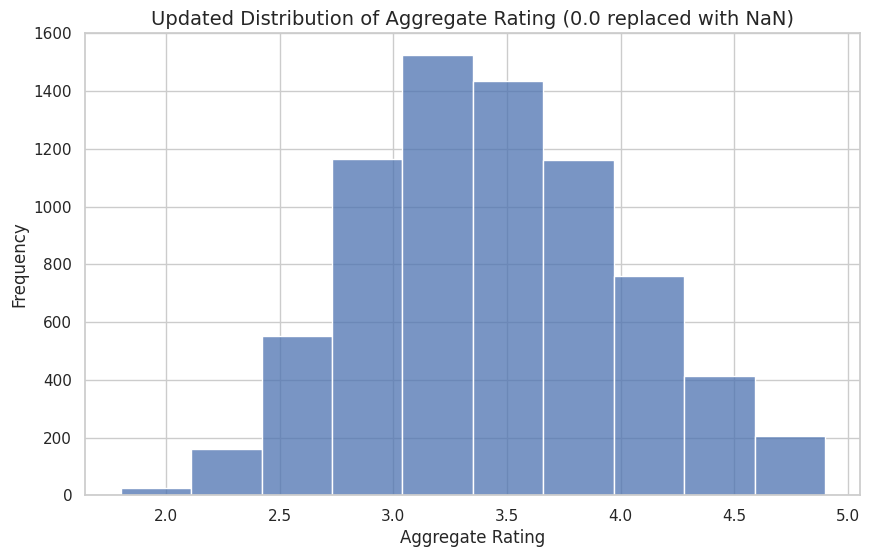

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.histplot(df['Aggregate rating'].dropna(), bins=10, kde=False)

plt.title('Updated Distribution of Aggregate Rating (0.0 replaced with NaN)', fontsize=14)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()
